# POLYNOMIAL REGRESSION


### BAD FIT

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=[21,12,11,22,33,32,23,34,40,94,9,6,5,31,56,65,67,76,77]
y=[23,43,53,66,76,89,90,9,5,2,10,39,25,50,19,13,17,71,99]

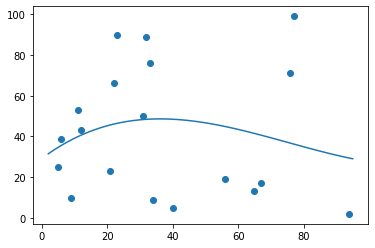

In [7]:
model= np.poly1d(np.polyfit(x,y,3))
line = np.linspace(2,95,100)
plt.scatter(x,y)
plt.plot(line,model(line))
plt.show()

In [8]:
# R2 SCORE FOR BAD FIT

from sklearn.metrics import r2_score
print(r2_score(y,model(x)))

0.033008279697807064


### EFFICIENT FIT

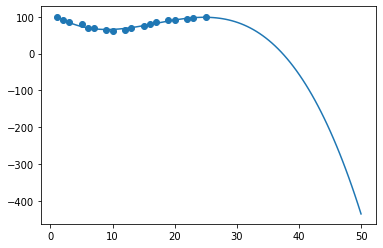

In [21]:
x1=[1,2,3,5,6,7,9,10,12,13,15,16,17,19,20,22,23,25]
y1=[100,90,85,80,70,70,65,60,65,70,75,80,85,90,92,95,97,98]

mod = np.poly1d(np.polyfit(x,y,3))
lin = np.linspace(1,50,100)

plt.scatter(x,y)
plt.plot(lin,mod(lin))
plt.show()

In [22]:
print(r2_score(y1,mod(x1)))

0.9584817362785796


In [25]:
mod(20)

91.17715340473409

### HANDS ON EXAMPLE

In [27]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# importing dataset
df = pd.read_csv("ml_data_salary.csv")
df.head()


,age,distance,YearsExperience,Salary
0,31.1,77.75,1.1,39343
1,31.3,78.25,1.3,46205
2,31.5,78.75,1.5,37731
3,32.0,80.00,2.0,43525
4,32.2,80.50,2.2,39891


In [54]:
# selecting columns for x and y
x=df[['YearsExperience']]
y=df[['Salary']]
y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


In [55]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [56]:
# splittingb the dataset into test  and train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
# fitting linear regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(x,y)

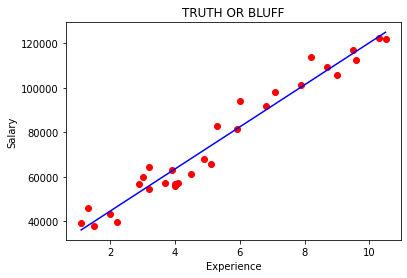

In [59]:
# visualizing the data
def viz_linear():
    plt.scatter(x,y,color='red')
    plt.plot(x,lin_reg.predict(x),color='blue')
    plt.title("TRUTH OR BLUFF")
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()


In [89]:
## fitting polynomial regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression().fit(x_poly,y)

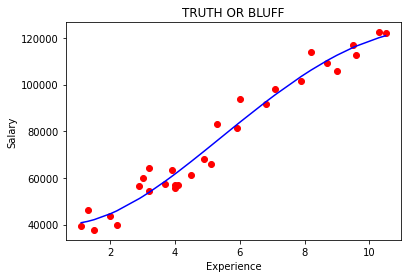

In [88]:
## visualizing the polynomial regression

def viz_polynomial():
    plt.scatter(x,y,color='red')
    plt.plot(x,pol_reg.predict(x_poly),color='blue')
    plt.title("TRUTH OR BLUFF")
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polynomial()

In [100]:
# predicting result with linear regression model

pred_lin=lin_reg.predict([[10]])
pred_lin

C:\Users\Muhammad Umer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[120291.82341322]])

In [101]:
# prediting the same result with polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
pred_poly = pol_reg.predict(poly_reg.fit_transform([[10]]))

In [102]:
print("Linear regression result: ",pred_lin)
print("Polynomial regresiion result: ",pred_poly)
print("Difference between results: ",pred_lin-pred_poly)

Linear regression result:  [[120291.82341322]]
Polynomial regresiion result:  [[118670.01478431]]
Difference between results:  [[1621.80862891]]
